In [20]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
import sys
import cv2
from tqdm import tqdm
from tqdm import trange

In [2]:
sys.executable

'/home/uih/miniconda3/envs/torch1.7/bin/python'

In [3]:
cwd = Path('.').resolve()
cwd

PosixPath('/home/uih/JYL/PycharmDeploy/SimpleYolov5')

In [4]:
sys.path.insert(0, str(cwd / 'dataset'))
from coco_generator import COCOGenerator

In [5]:
coco = COCOGenerator('/home/uih/JYL/Dataset/COCO2017/', 'train2017', False)

loading annotations into memory...
Done (t=13.29s)
creating index...
index created!


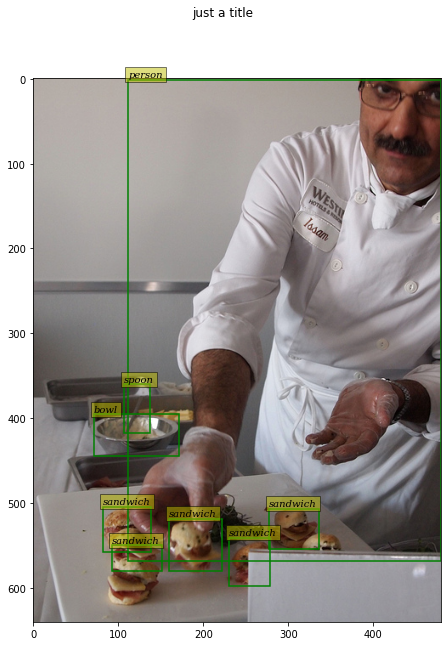

In [6]:
coco.test_coco()

In [14]:
save_dir = Path("/home/uih/JYL/Dataset/COCO2017/single_object_img/")

In [27]:
global_id = 0
for i in trange(len(coco.img_ids)):
    img_path = coco.get_img_path(i)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ann = coco.load_annotations(i)
    names = [coco.class2label[c] for c in ann['classes']]
    global_id += i
    for j, box in enumerate(ann['bboxes']):
        global_id += j
        label = coco.class2label[ann['classes'][j]]
        cls = ann['classes'][j]
        box = np.ceil(box).astype(np.uint16)
        xmin, ymin, xmax, ymax = box
        obj_img = img[ymin:ymax, xmin:xmax, :]
        if obj_img.shape[0] != 224 and obj_img.shape[1] != 224:
            obj_img = cv2.resize(obj_img, dsize=(224, 224), interpolation=cv2.INTER_LINEAR)
        save_path = save_dir / f"imgid{coco.img_ids[i]}_objid{i}_clsid{cls}_{label}_globalid{global_id}.jpg"
        assert not save_path.exists()
        cv2.imwrite(str(save_path), obj_img[:, :, ::-1])

100%|██████████| 118287/118287 [1:30:19<00:00, 21.83it/s]  


In [24]:
all_img_files = [_ for _ in save_dir.iterdir()]
len(all_img_files)

3530

In [12]:
box

array([360., 147., 472., 360.])

In [10]:
ann

{'classes': array([39, 79, 79, 61, 71, 39, 39, 39, 39, 79, 39]),
 'bboxes': array([[382.54, 230.59, 409.2 , 272.12],
        [519.51,  20.18, 526.73,  46.96],
        [498.17,  27.38, 510.15,  46.58],
        [202.95, 247.94, 336.97, 421.21],
        [473.87, 284.98, 640.  , 419.01],
        [367.88, 133.83, 388.39, 153.47],
        [385.71, 139.57, 401.81, 154.74],
        [477.61, 240.8 , 487.25, 263.23],
        [486.58, 240.09, 503.5 , 272.29],
        [129.86,  73.7 , 140.97,  85.24],
        [357.23, 234.8 , 376.93, 258.95]])}